### 모델 성능평가 지표 살펴보기 => 다중분류
- sklearn : metrics   
    (accuracy_score, confusion_matrix, classification_report)
- torch : torchmetrics

0. Load Module

In [6]:
import torch
import torchmetrics.functional.classification as metrics
import sklearn.metrics as skm
import numpy as np
import matplotlib.pyplot as plt

1. Set Data

In [7]:
target = torch.tensor([2, 1, 0, 0])
preds = torch.tensor([2, 1, 0, 1])  # 임의의 데이터 : 다중분류 0, 1, 2

2. 성능 평가

In [8]:
# 혼돈 행렬 Confusion Metrix
con = metrics.confusion_matrix(preds, target, task='multiclass', num_classes=3)
print(con)

tensor([[1, 1, 0],
        [0, 1, 0],
        [0, 0, 1]])


In [9]:
# micro : 균형 데이터셋
pre = metrics.precision(preds, target, task='multiclass', num_classes=3, average='micro')
recall = metrics.recall(preds, target, task='multiclass', num_classes=3, average='micro')
f1 = metrics.f1_score(preds, target, task='multiclass', num_classes=3, average='micro')
accuracy = metrics.accuracy(preds, target, task='multiclass', num_classes=3, average='micro')
metrics.multiclass_accuracy(preds, target, num_classes=3, average='micro')

print(f'Target ==> {target}')
print(f'Pred ==> {preds}')
print()
print(f'Precision : {pre} \nRecall : {recall} \nF1 Score : {f1} \nAccuracy : {accuracy}')

Target ==> tensor([2, 1, 0, 0])
Pred ==> tensor([2, 1, 0, 1])

Precision : 0.75 
Recall : 0.75 
F1 Score : 0.75 
Accuracy : 0.75


2-2. 성능평가 : scikit-learn

[[1 1 0]
 [0 1 0]
 [0 0 1]]


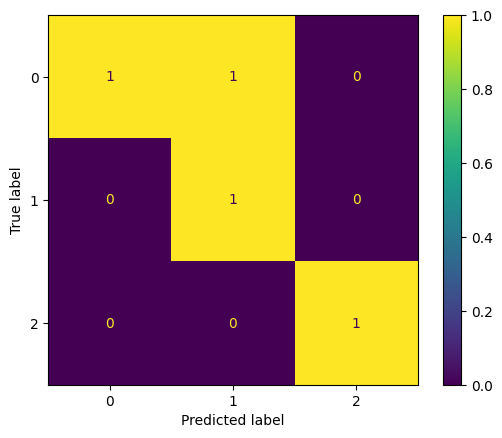

In [10]:
# Confusion Metrix

# Tensor ==> Numpy
# 1)
np.array(target)
# 2)
target.numpy()

preds = preds.numpy()
target = target.numpy()

# (정답, 예측)
con = skm.confusion_matrix(target, preds)
print(con)

corrDisplay = skm.ConfusionMatrixDisplay(confusion_matrix=con, display_labels=np.unique(target))
corrDisplay.plot()
plt.show()

In [11]:
# 다중분류 성능 분석 - micro : 균형데이터셋
p_score = skm.precision_score(target, preds, average='micro')
r_score = skm.recall_score(target, preds, average='micro')
f_score = skm.f1_score(target, preds, average='micro')
a_score = skm.accuracy_score(target, preds)
report = skm.classification_report(target, preds)

In [12]:
print(f'Target -> {target}')
print(f'Pred -> {preds}')
print(f'Precision : {p_score} \nRecall : {r_score} \nF1 Score : {f_score} \nAccuracy : {a_score}')
print(report)

Target -> [2 1 0 0]
Pred -> [2 1 0 1]
Precision : 0.75 
Recall : 0.75 
F1 Score : 0.75 
Accuracy : 0.75
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1

    accuracy                           0.75         4
   macro avg       0.83      0.83      0.78         4
weighted avg       0.88      0.75      0.75         4

